In [33]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")
from pydataset import data

pd.set_option('display.max_rows', 100)

np.random.seed(42)

In [2]:
df = data('iris')
for col in df.columns:
    df = df.rename(columns={col: col.lower().replace('.', '_')})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


#### 1a. Perform clustering on the iris dataset. use features other than the ones used in the lesson

In [3]:
x = df[['petal_width', 'sepal_width']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
df['cluster'] = kmeans.predict(x)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [5]:
#### 1b. visualize the results of your clustering

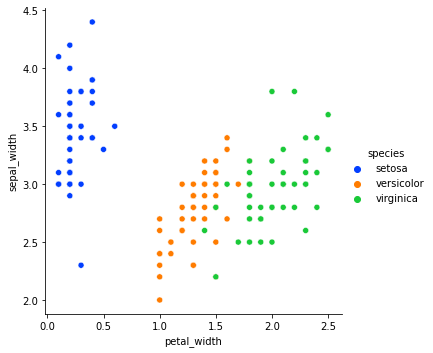

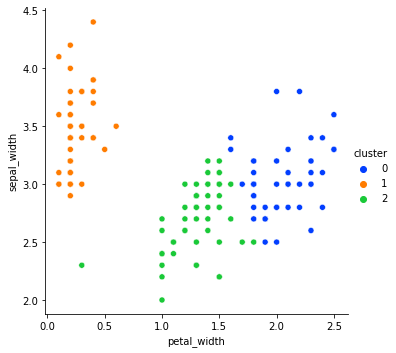

In [6]:
palette='bright'
sns.relplot(data=df, x='petal_width', y='sepal_width', hue='species', palette=palette)
plt.show()
sns.relplot(data=df, x='petal_width', y='sepal_width', hue='cluster', palette=palette)
plt.show()

#### 1c. Use the elbow method to visually select a good value for k

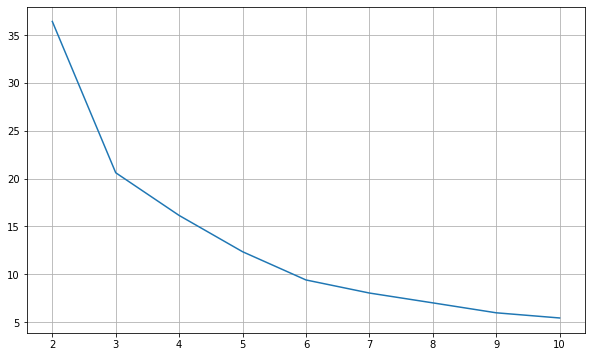

In [7]:
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias[k] = kmeans.inertia_
plt.figure(figsize=(10, 6))    
pd.Series(inertias).plot()
plt.grid()
plt.show()

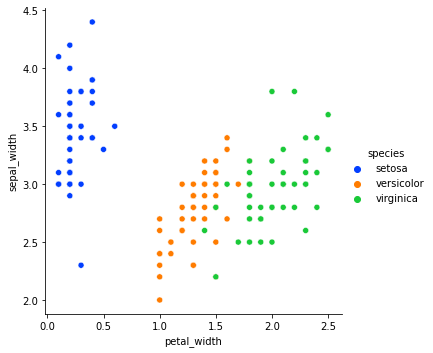

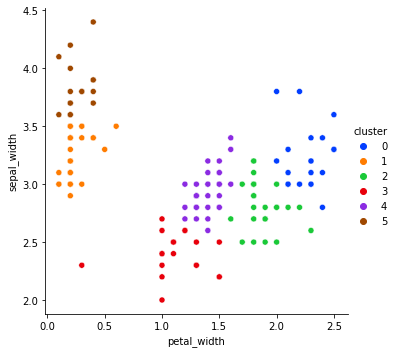

In [8]:
# selecting n_clusters=6 based on vizualization above
x = df[['petal_width', 'sepal_width']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)
df['cluster'] = kmeans.predict(x)

palette='bright'

sns.relplot(data=df, x='petal_width', y='sepal_width', hue='species', palette=palette)
plt.show()
sns.relplot(data=df, x='petal_width', y='sepal_width', hue='cluster', palette=palette)
plt.show()

#### 1d. Repeat the clustering, this time with 3 different features

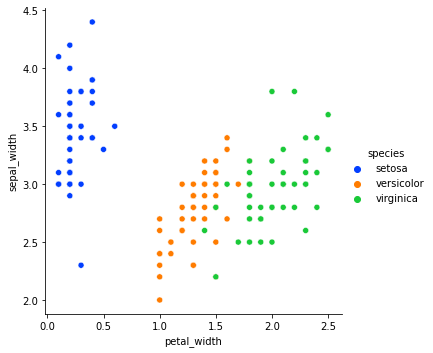

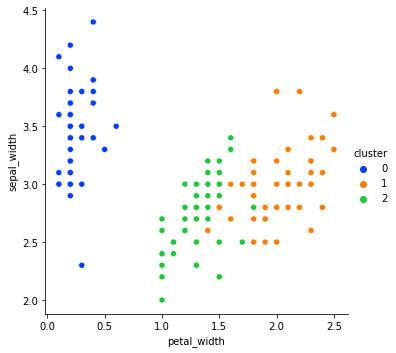

In [9]:
# selecting n_clusters=6 based on vizualization above
x = df[['petal_width', 'sepal_width', 'petal_length']]

#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [10]:
url = env.get_db_url('mall_customers')
sql = '''SELECT * FROM customers'''
df = pd.read_sql(sql, url)

In [11]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


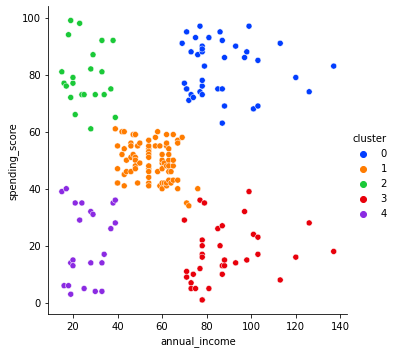

In [12]:
x = df[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
df['cluster'] = kmeans.predict(x)

palette='bright'
sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster', palette=palette)
plt.show()

#### 3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually. 

#### Bonus A) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [17]:
df = pd.read_csv('cluster_data.csv')
df = df.rename(columns={'x': 'col1', 'y': 'col2'})
df.head()

,col1,col2
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


 #### Bonus A) Visualize the data and guess the number and shape of the clusters

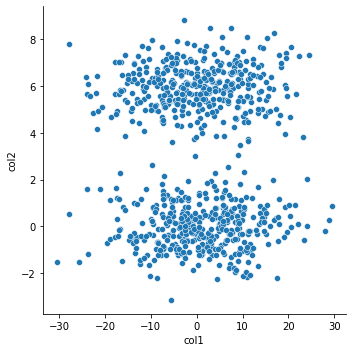

In [28]:
sns.relplot(data=df, x='col1', y='col2')
plt.show()

Guess = 2 clusters: col2 < 3, col2 > 3

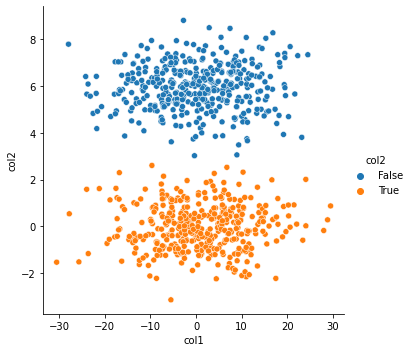

In [29]:
sns.relplot(data=df, x='col1', y='col2', hue=(df.col2<3))
plt.show()

#### Bonus c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

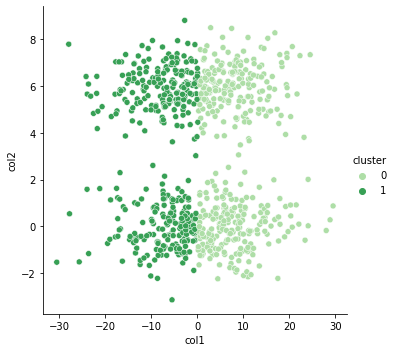

In [53]:
x = df[['col1', 'col2']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
df['cluster'] = kmeans.predict(x)

sns.relplot(data=df, x='col1', y='col2', hue='cluster', palette='Greens')
plt.show()

#### Bonus D) Repeat the steps above but with scaled data:

In [44]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

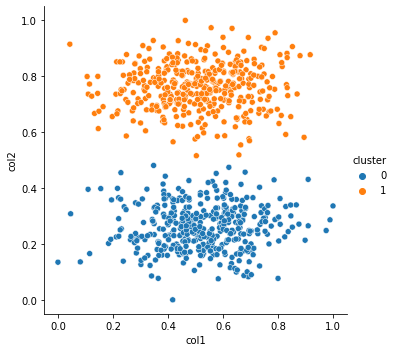

In [47]:
x = df_scaled[['col1', 'col2']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
df_scaled['cluster'] = kmeans.predict(x)

sns.relplot(data=df_scaled, x='col1', y='col2', hue='cluster', palette)
plt.show()